In [5]:
%matplotlib inline

from tqdm.notebook import tqdm as tqdm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import pickle

import umap

import gc


c:\MLAI\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\MLAI\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\MLAI\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' dec

### Loading Data

In [2]:
gc.collect()

0

In [3]:
with open("../data/labels", 'rb') as fp:
    targets = pickle.load(fp)

with open('../data/weights_dictionary.pkl', 'rb') as fp:
    weights = pickle.load(fp)

targets = np.array(targets) ##new

In [20]:
weights_array = np.array(tuple(weights.values()))

In [5]:
# weights_pd = pd.DataFrame.from_dict(weights)
# weights_pd['digit'] = pd.Series(targets).map(lambda x: 'Digit {}'.format(x))

### UMAP

In [6]:
reducer = umap.UMAP(random_state=42)

In [14]:
def plot_fig(embed,tg,f_no): 

    plt.figure(figsize=[25,10])
    plt.scatter(
        embed[:, 0],
        embed[:, 1],
        c=tg
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the MNIST dataset', fontsize=24)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.scatter(embed[9999,0], embed[9999,1],color='r')
    # plt.savefig("figpath/{}.png".format(f_no))

In [15]:
def plot_embedding(interval=19):

    for i in range(interval):

        embedding = reducer.fit_transform(np.delete(weights_array,np.s_[500+i:-1],1))

        plot_fig(embedding,targets,500+i)

    embedding = reducer.fit_transform(np.delete(weights_array,np.s_[9049+i:-1],1))
    plot_fig(embedding,targets,9049)


In [70]:
index_0 = np.where(targets == 0)
index_6 = np.where(targets == 6)

weights_array_0 = weights_array[tuple(index_0)]
weights_array_6 = weights_array[tuple(index_6)]

s = np.concatenate((weights_array_0,weights_array_6))
np.random.shuffle(s)

In [71]:
s.shape

(1951, 9051)

ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 1951.

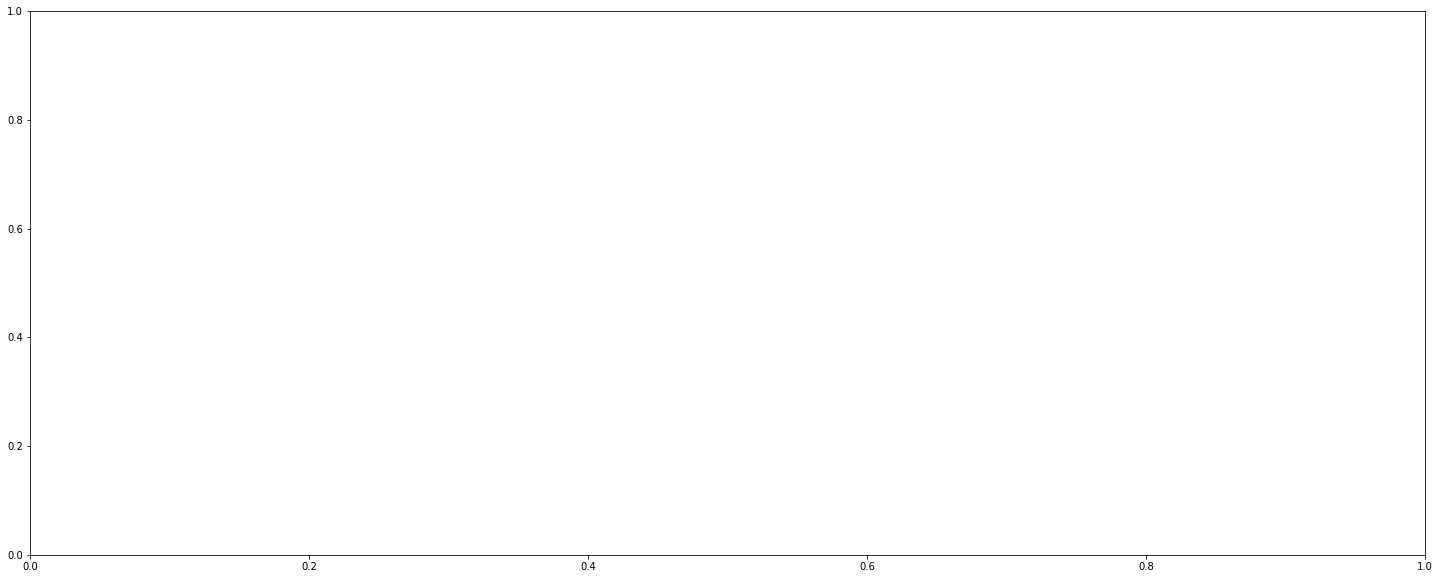

In [72]:
embedding = reducer.fit_transform(np.delete(s,np.s_[9050:-1],1))

plot_fig(embedding,targets,5)

## when you shuffle the values you also have to shuffle the targets.

### Classifier

In [24]:
def classifier(input_array,c_name,scale,pca_val = None):

    input_data = input_array

    
    if scale == True:
        
        scaler = StandardScaler()
        input_data = scaler.fit_transform(input_data)

    if pca_val != None:

        pca = PCA(n_components=pca_val)
        input_data = pca.fit_transform(input_data)
        

    x_train, x_test, y_train, y_test = train_test_split(input_data, targets, test_size=0.25, random_state=42)

    if c_name == "logit":

        logisticRegr = LogisticRegression(solver = 'lbfgs')
        logisticRegr.fit(x_train, y_train)

        y_pred = logisticRegr.predict(x_test)

        # Use score method to get accuracy of model
        test_accuracy = logisticRegr.score(x_test, y_test)
        train_accuracy = logisticRegr.score(x_train,y_train)
        
    if c_name == "forest":
        
        rf = RandomForestClassifier(n_estimators=300,max_depth=14)
        rf.fit(x_train, y_train)    

        y_pred = rf.predict(x_test)
        y_pred_train = rf.predict(x_train)

        test_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Metrics

    print("Test accuracy",test_accuracy,"Train accuracy",train_accuracy)
            
    cm = metrics.confusion_matrix(y_test, y_pred) # Confusion matrix

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(test_accuracy)
    plt.title(all_sample_title, size = 15);
        
    return 0

### Visualise

Test accuracy 0.4056 Train accuracy 0.9996


0

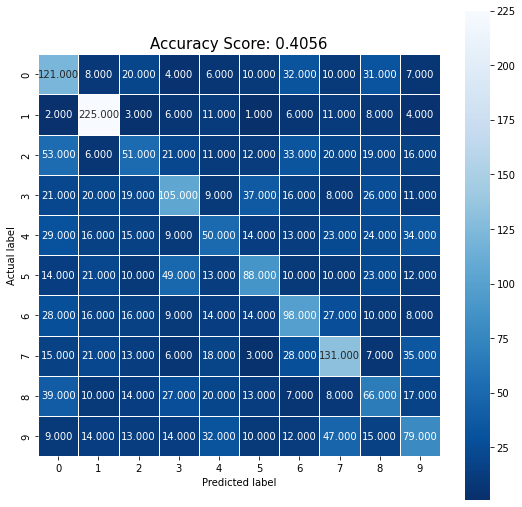

In [25]:
classifier(weights_array,'forest',True,200)

#### SVM with RBF

In [38]:
# from sklearn.svm import SVC, LinearSVC
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

In [39]:
# coefficient = []
# n_supp = []
# sup_vec = []
# i = 0
# df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
# for c in [10]:
#     for g in [0.01]:
#         svm = SVC(kernel='rbf', C=c, gamma=g)
#         model = svm.fit(x_train, y_train)
#         globals()['model%s' % i] = model
#         d_coef = svm.dual_coef_
#         support = svm.n_support_
#         sv = svm.support_
    
#         p_tr = svm.predict(x_train)
#         a_tr = accuracy_score(y_train, p_tr)
    
#         pred = svm.predict(x_test)
#         a = accuracy_score(y_test, pred)
    
#         coefficient.append(d_coef)
#         n_supp.append(support)
#         sup_vec.append(sv)
#         df.loc[i] = [c,g,a_tr,a]
#         i=i+1

